In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [8]:
ref = pd.read_excel("etwas.xlsx")
ref = ref.astype('str')
cols = ref.columns
for col in cols[4:]:
    if not ref[col].dtype == 'float64':
        ref[col] = ref[col].str.removeprefix('<')
ref.replace("NR", None, inplace = True)
ref
ref.iloc[:, 4:] = ref.iloc[:, 4:].astype('float32')
ref['Tissue'].replace('WM', 'MT', inplace = True)
ref['Tissue'].replace('L', 'Liver', inplace = True)
ref.drop(columns=['Ag'], inplace=True)
cols = ref.columns.to_list()
cols[5:] = ["Arsenic", "Cadmium", "Chromium", "Copper", "Mercury", "Zinc", "Sodium"]
ref.columns = cols
ref

,Fish,Tissue,Group,color,Moisture,Arsenic,Cadmium,Chromium,Copper,Mercury,Zinc,Sodium
0,"MacDonald, 1997",MT,Upper Fraser River,sandybrown,78.800003,0.92,0.05,0.122,0.256,0.575,2.76,NaN
1,"MacDonald, 1997",Liver,Upper Fraser River,sandybrown,68.0,1.56,1.09,0.696,26.9,1.37,41.5,NaN
2,"MacDonald, 1997",MT,Upper Fraser River,sandybrown,78.400002,0.88,0.44,0.125,0.376,1.42,3.09,NaN
3,"MacDonald, 1997",Liver,Upper Fraser River,sandybrown,66.199997,1.2,0.3,0.545,7.21,1.24,18.1,NaN
4,"MacDonald, 1997",MT,Upper Fraser River,sandybrown,78.400002,0.88,0.4,0.102,0.244,0.18,3.33,NaN
5,"MacDonald, 1997",Liver,Upper Fraser River,sandybrown,63.200001,1.44,0.34,0.338,24.700001,0.16,47.400002,NaN
6,"MacDonald, 1997",MT,Upper Fraser River,sandybrown,NaN,NaN,NaN,NaN,NaN,0.27,NaN,NaN
7,"MacDonald, 1997",MT,Upper Fraser River,sandybrown,68.800003,NaN,NaN,NaN,NaN,0.83,NaN,NaN
8,"MacDonald, 1997",Liver,Upper Fraser River,sandybrown,45.900002,NaN,NaN,NaN,NaN,0.44,NaN,NaN
9,"Webb, 2006",MT,Lower Columbia River,pink,50.0,NaN,NaN,NaN,NaN,0.17,NaN,NaN


In [9]:
data = pd.read_excel("matlab_XLR.xlsx", sheet_name="Results Summary")
vn = data.columns
lt_track = np.zeros(data.shape, dtype = "bool")
for i in np.arange(3, len(vn)):
    lt_track[:, i] = ~(data[vn[i]].str.removeprefix("<") == data[vn[i]])
    temp = data[vn[i]].str.removeprefix("<")
    data[vn[i]] = temp
    
data.head()

,Analyte,Lowest\nDetection Limit,Units,White Sturgeon (WS #1) MT,White Sturgeon (WS #2) MT,White Sturgeon (WS #3) MT,White Sturgeon (WS #4) MT,White Sturgeon (WS #5) MT,White Sturgeon (WS #7) MT,White Sturgeon (WS #10) MT,White Sturgeon (WS #11) MT,White Sturgeon (WS #13) MT,White Sturgeon (WS #1) Liver,White Sturgeon (WS #2) Liver,White Sturgeon (WS #4) Liver,White Sturgeon (WS #5) Liver,White Sturgeon (WS #7) Liver,White Sturgeon (WS #10) Liver,White Sturgeon (WS #11) Liver,White Sturgeon (WS #13) Liver
0,Moisture,0.500,%,73.0,70.7,66.0,72.8,74.9,72.9,77.5,72.7,77.7,58.2,50.1,69.8,62.5,57.2,55.6,63.3,75.4
1,Aluminum,2.000,mg/kg,10.0,18.0,2.0,37.0,2.0,2.8,2.4,2.5,4.4,7.2,3.7,9.7,3.8,9.4,9.8,7.9,26.4
2,Aluminum,0.400,mg/kg wwt,2.71,5.28,0.42,10.1,0.49,0.77,0.54,0.69,0.98,3.03,1.86,2.94,1.42,4.03,4.33,2.89,6.52
3,Antimony,0.010,mg/kg,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.023
4,Antimony,0.002,mg/kg wwt,0.0020,0.0022,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0020,0.0021,0.0029,0.0024,0.0020,0.0037,0.0057


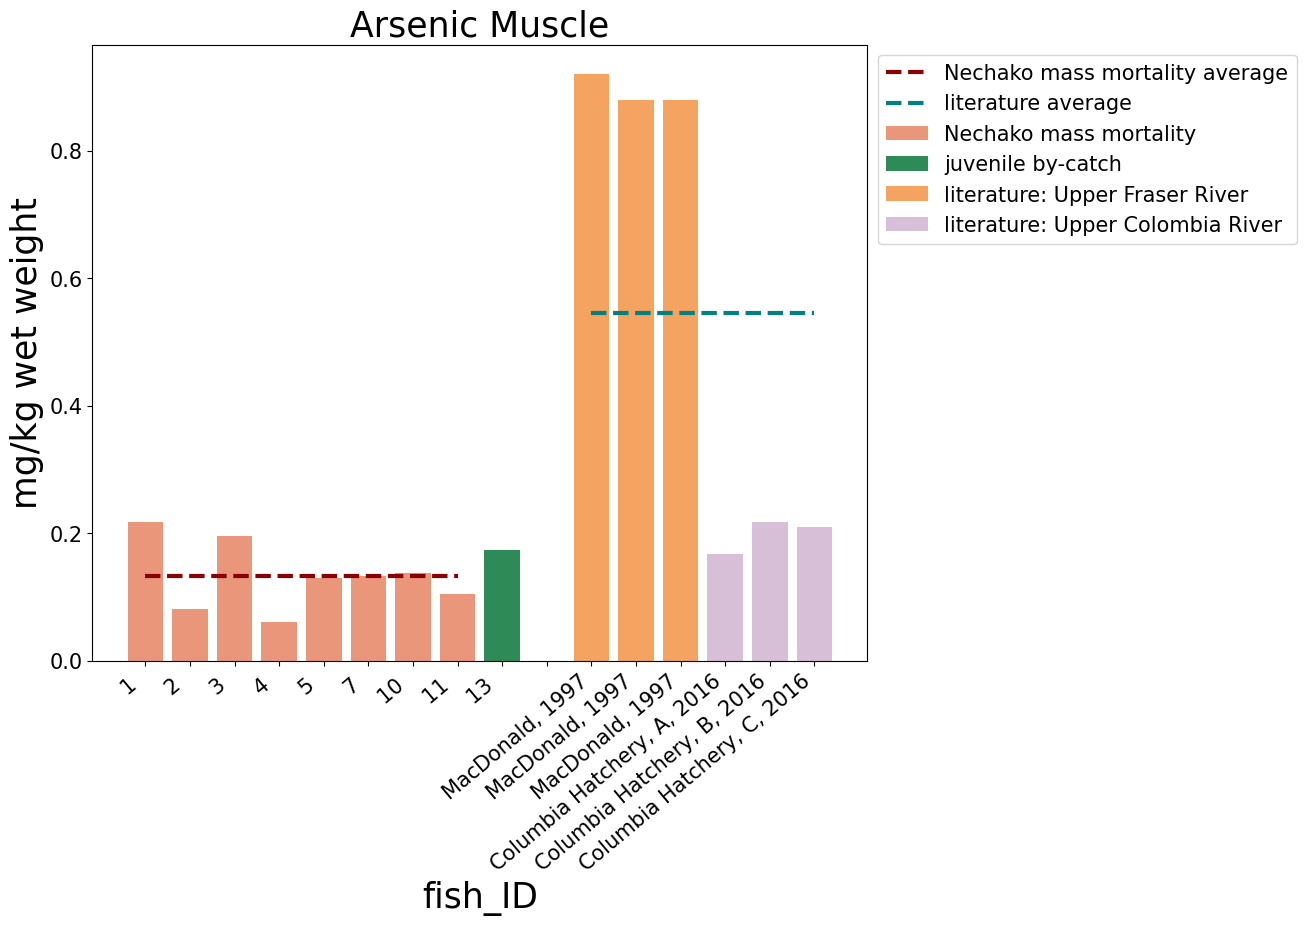

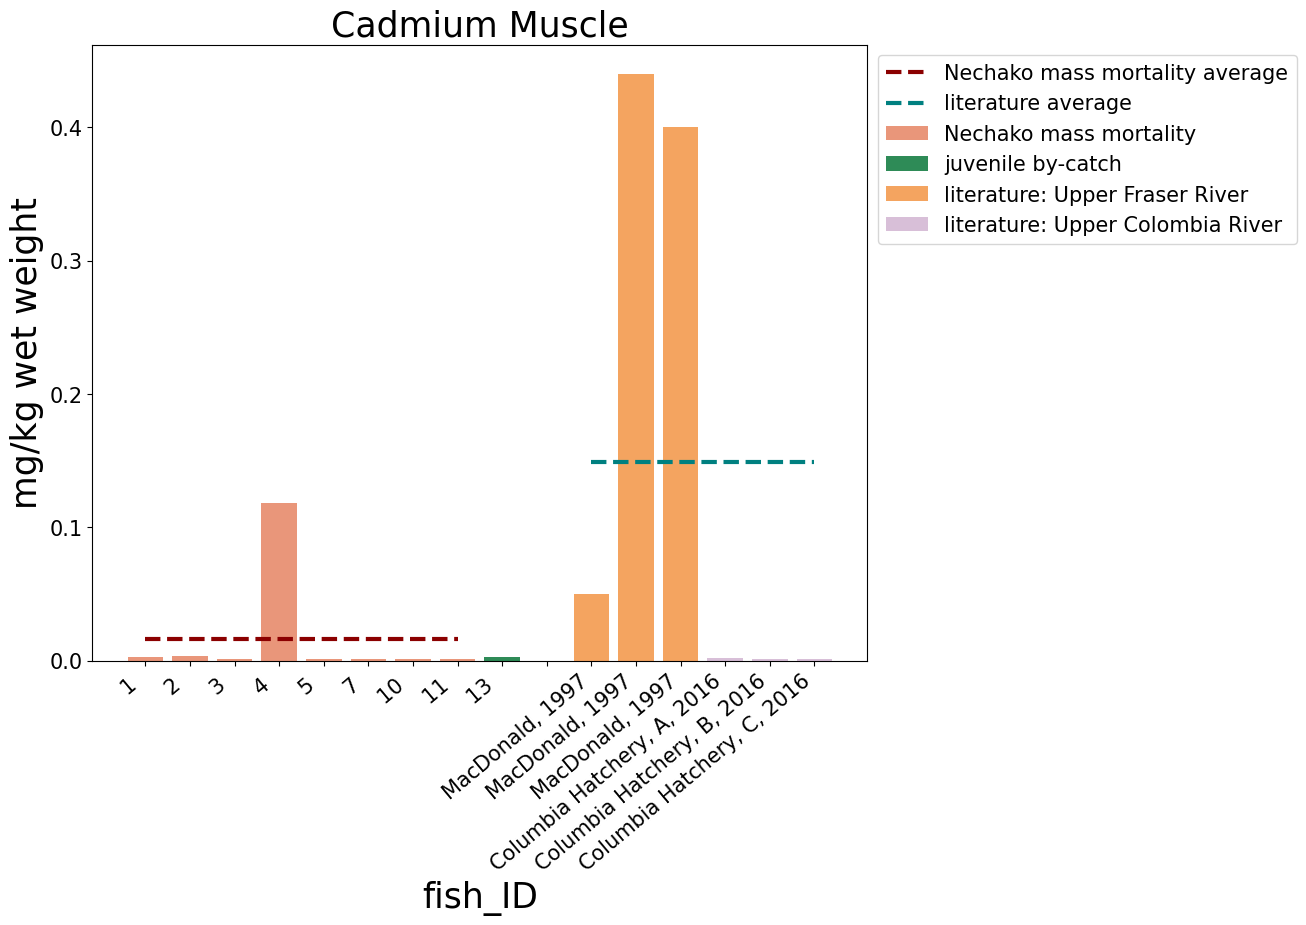

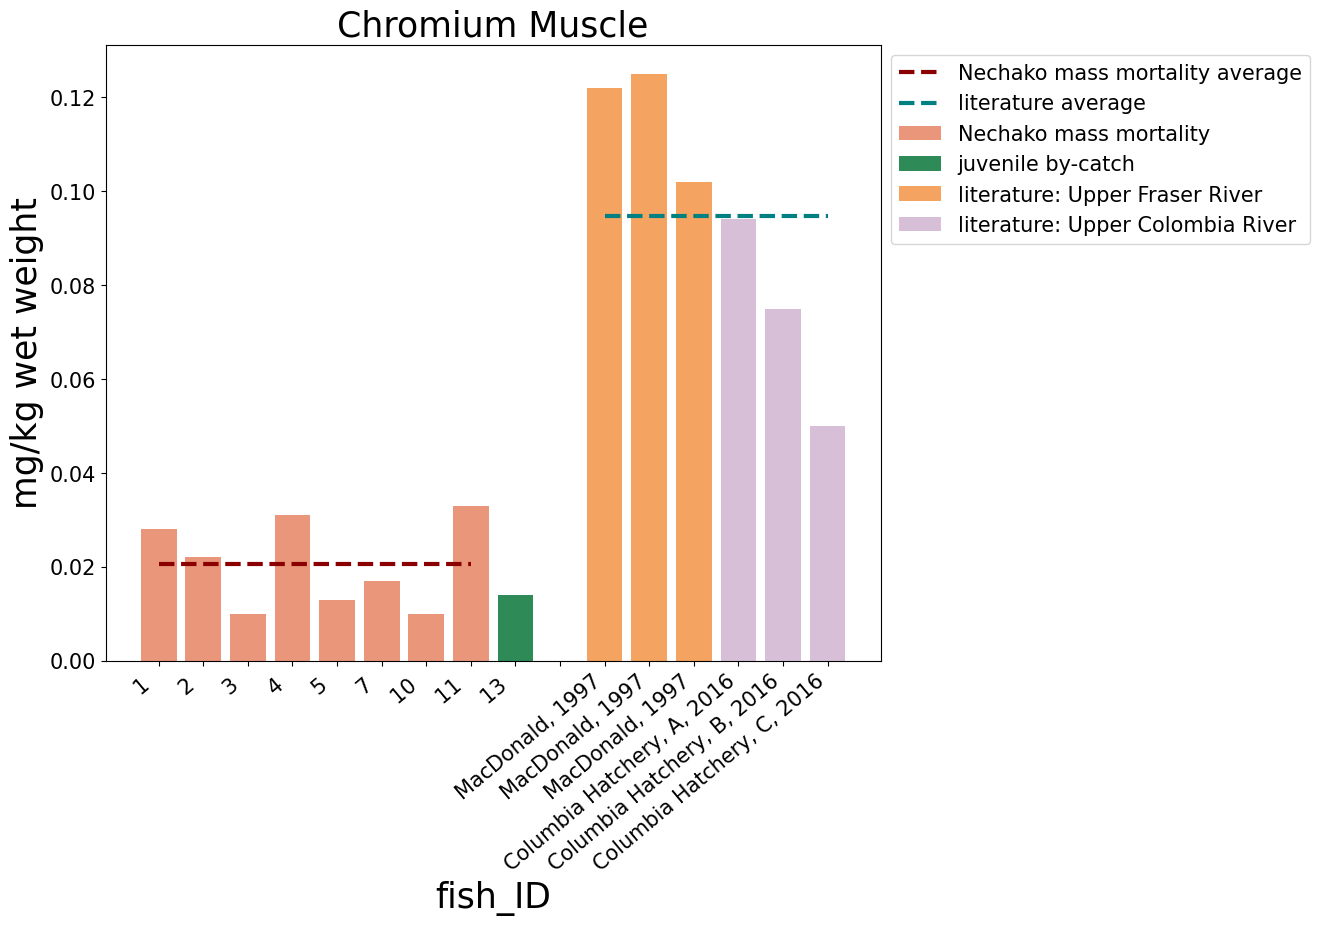

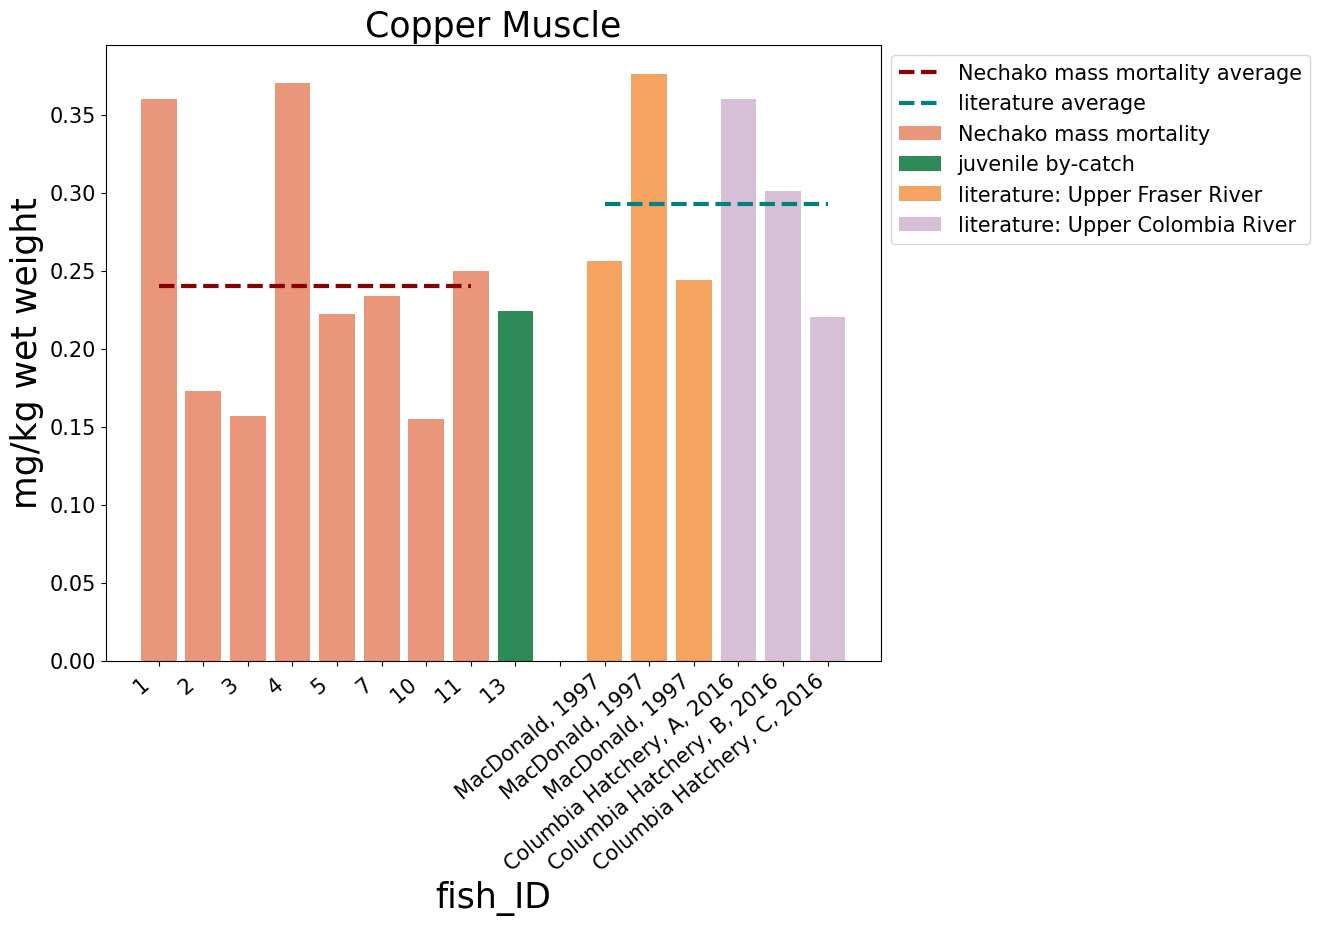

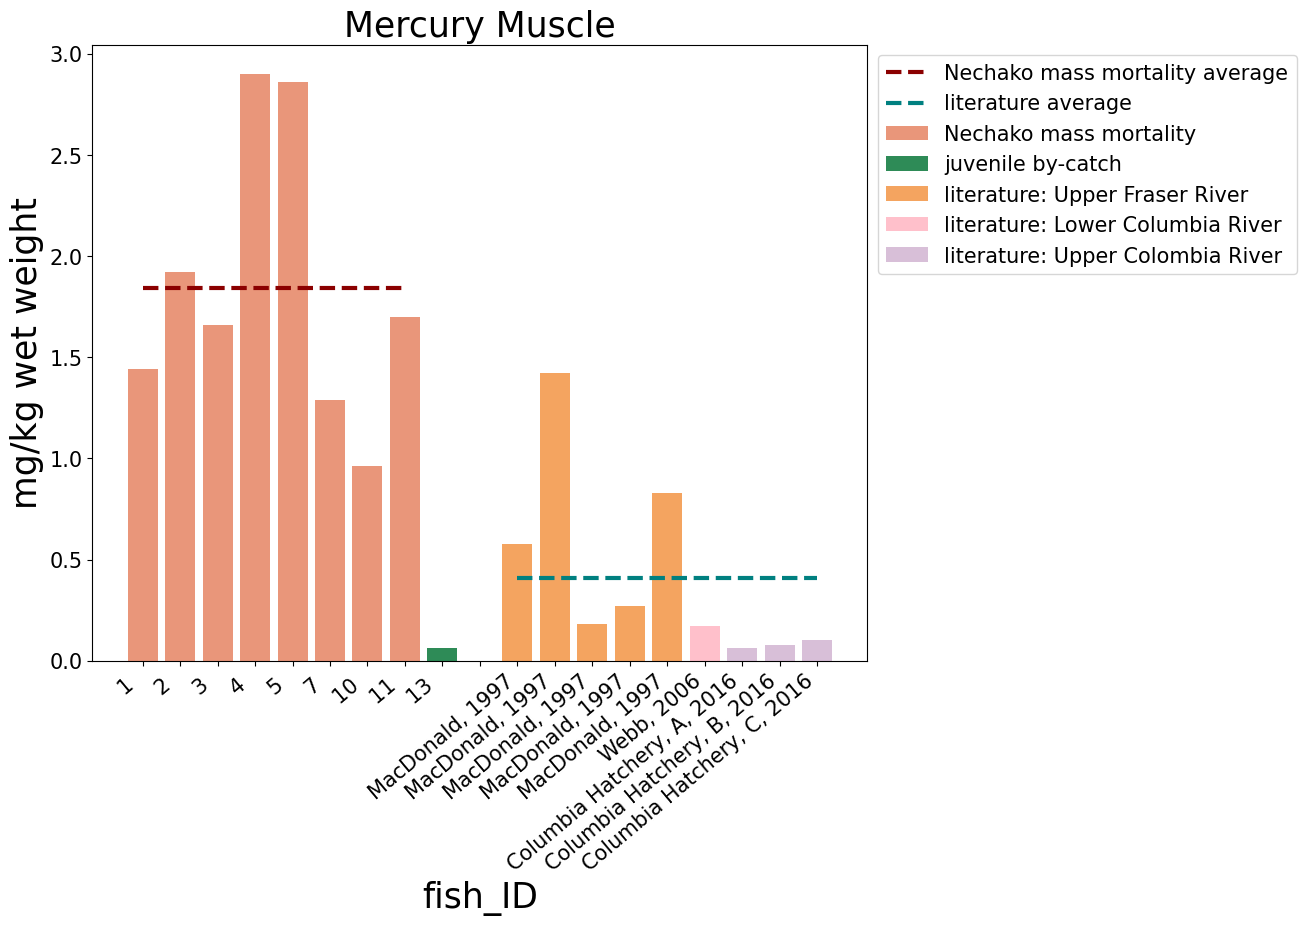

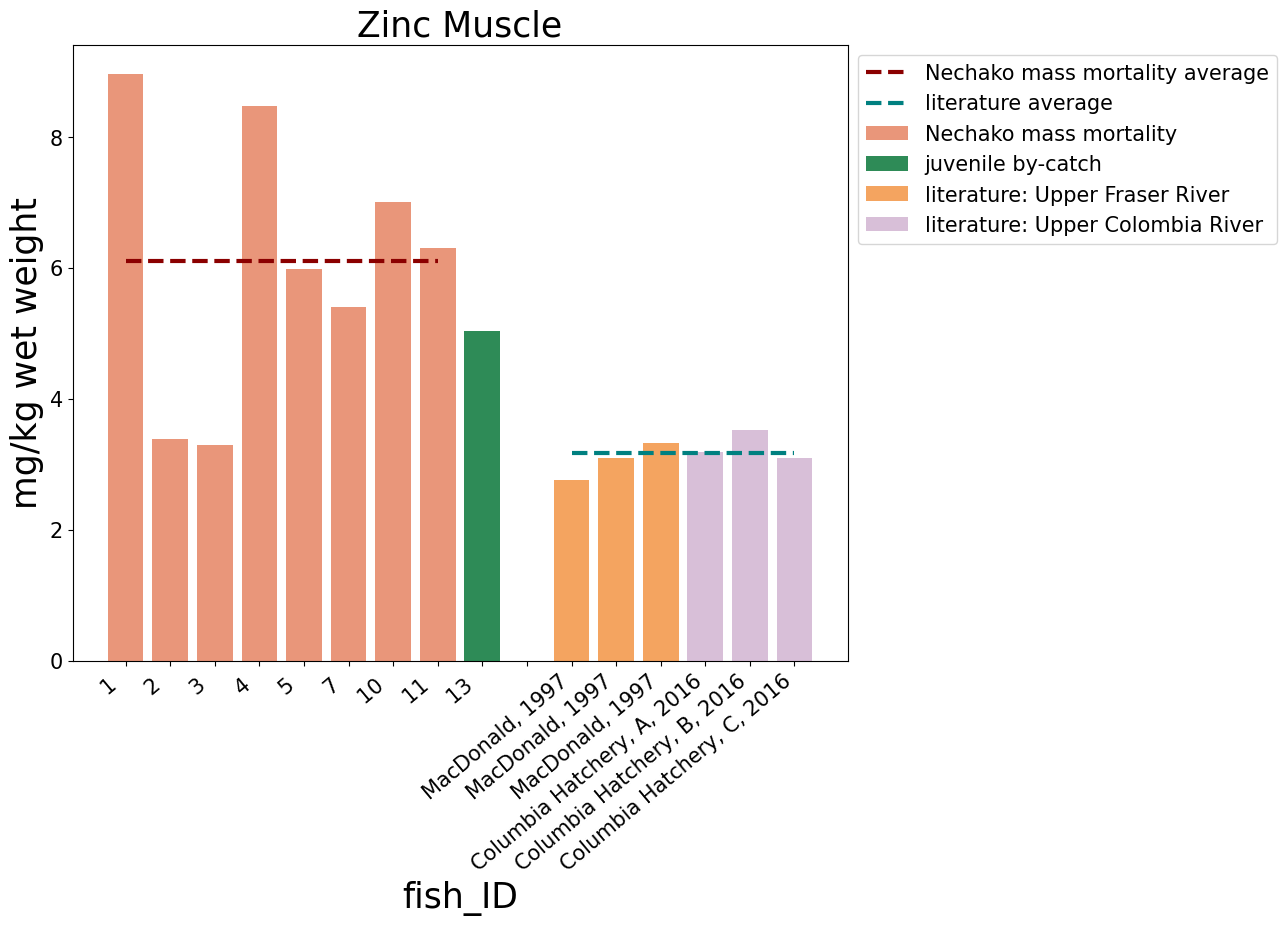

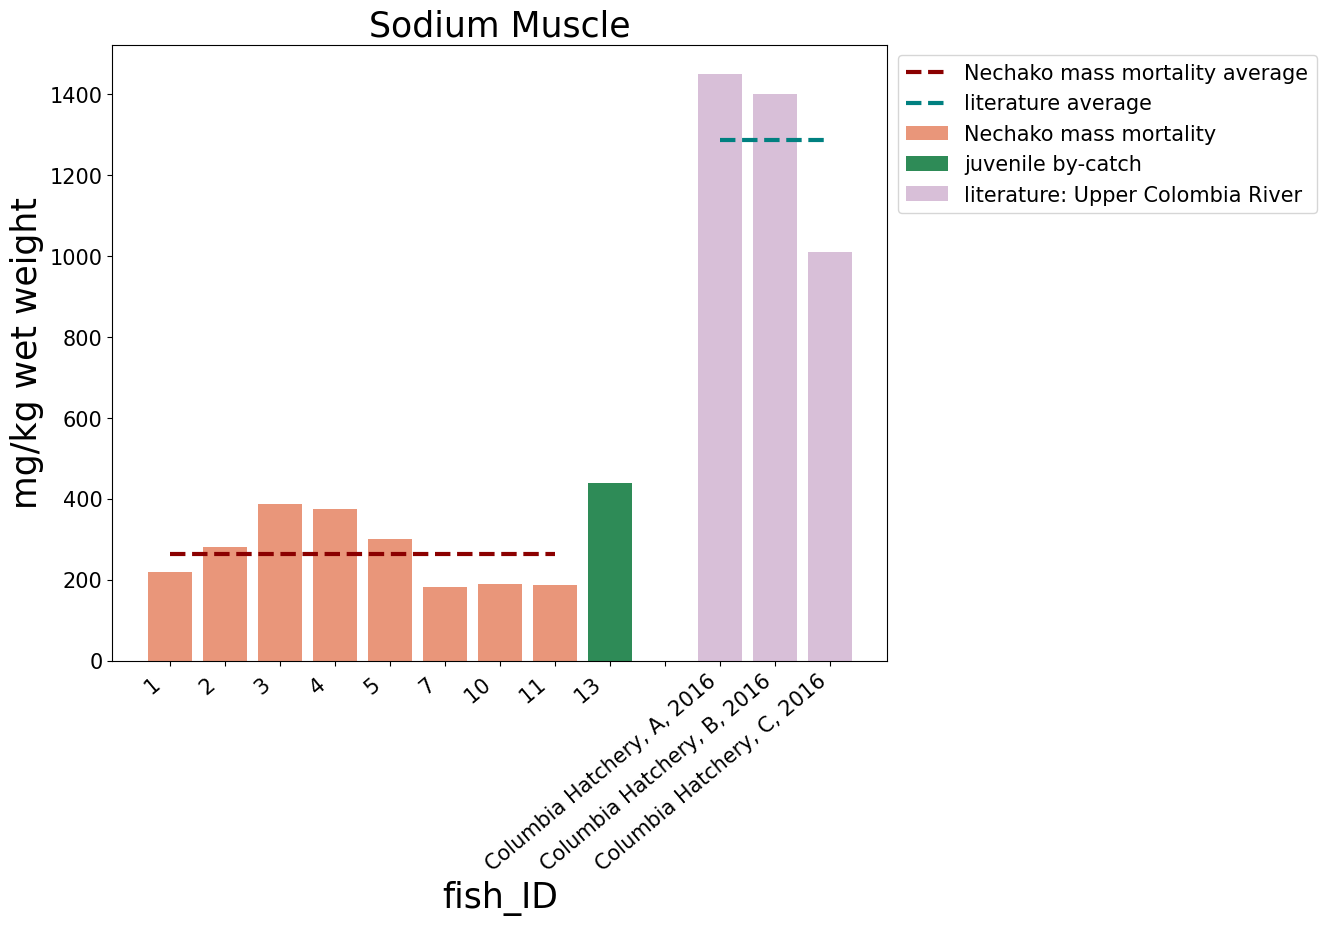

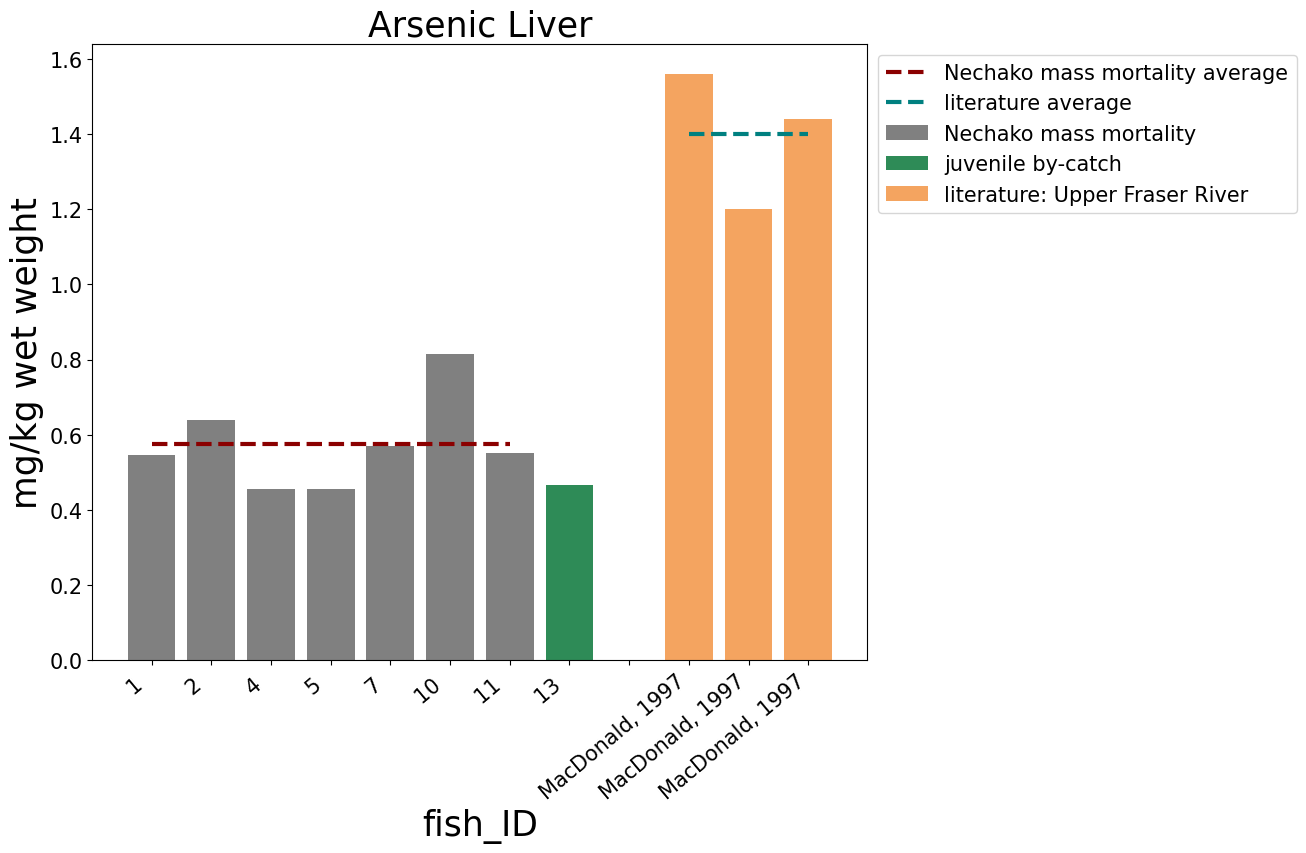

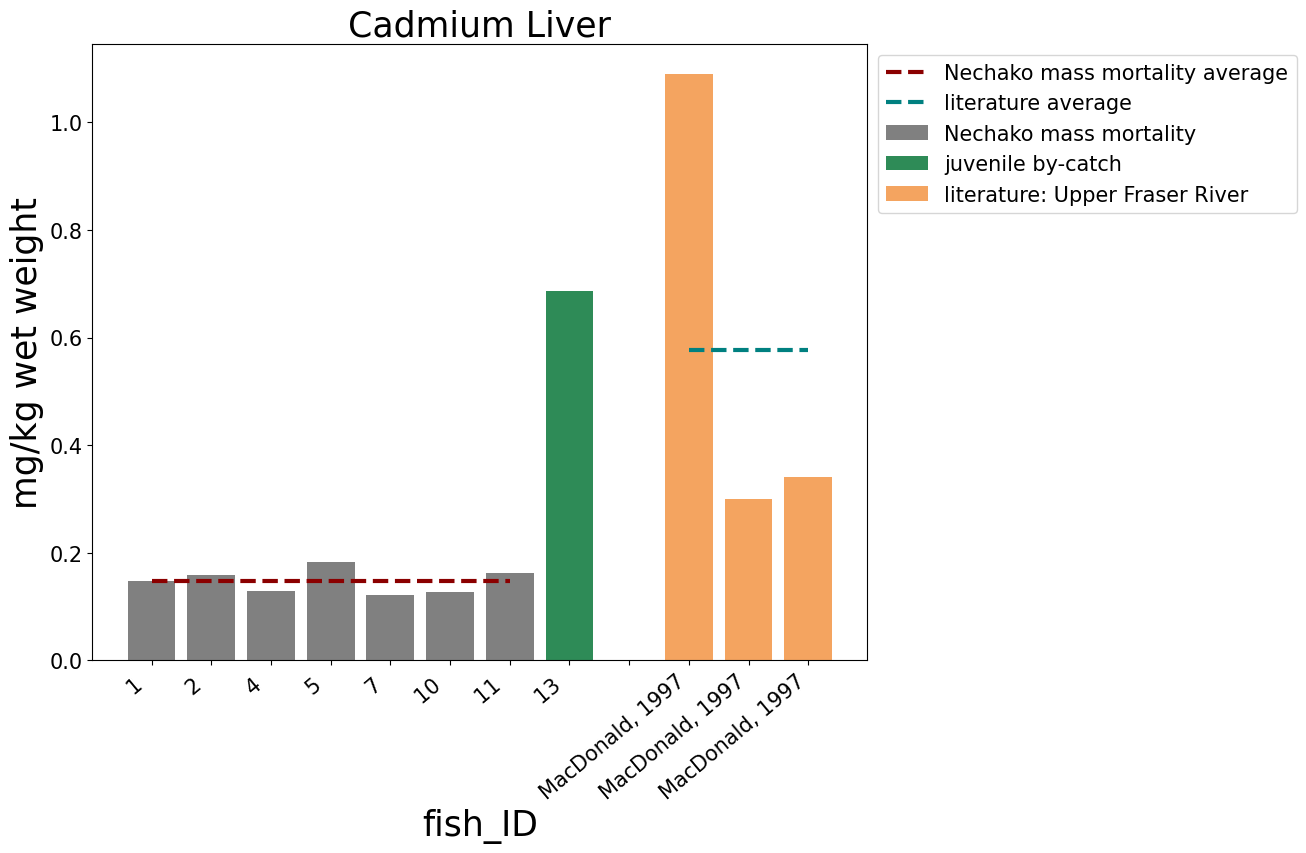

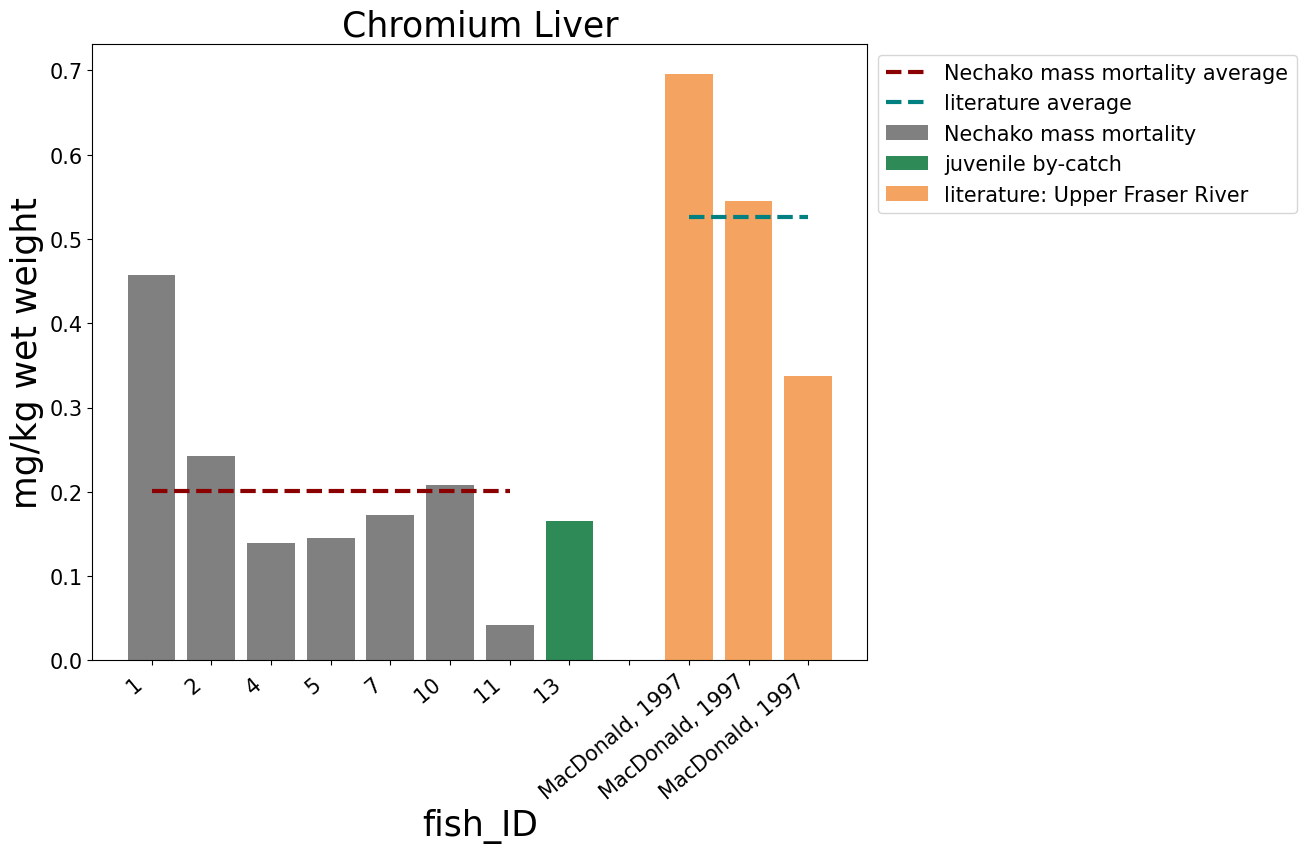

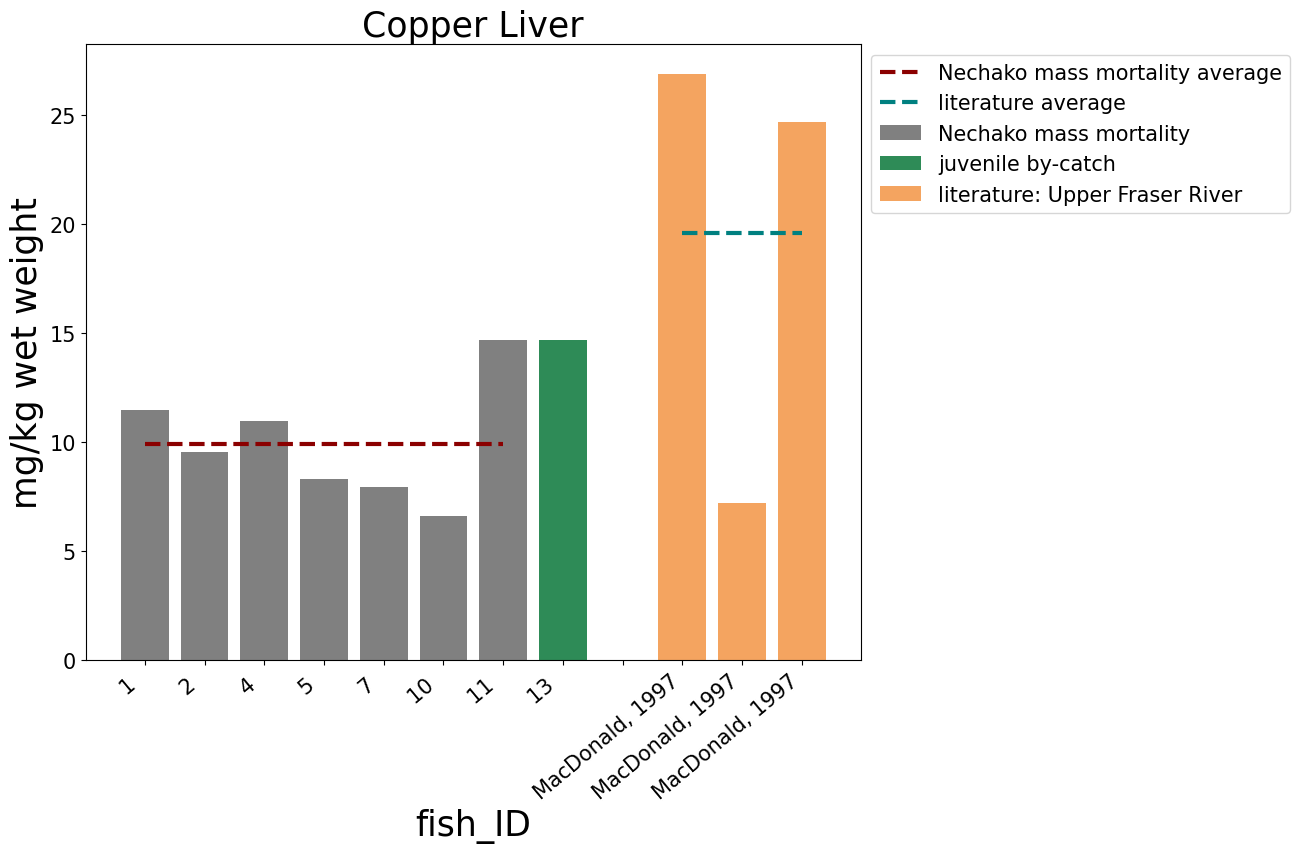

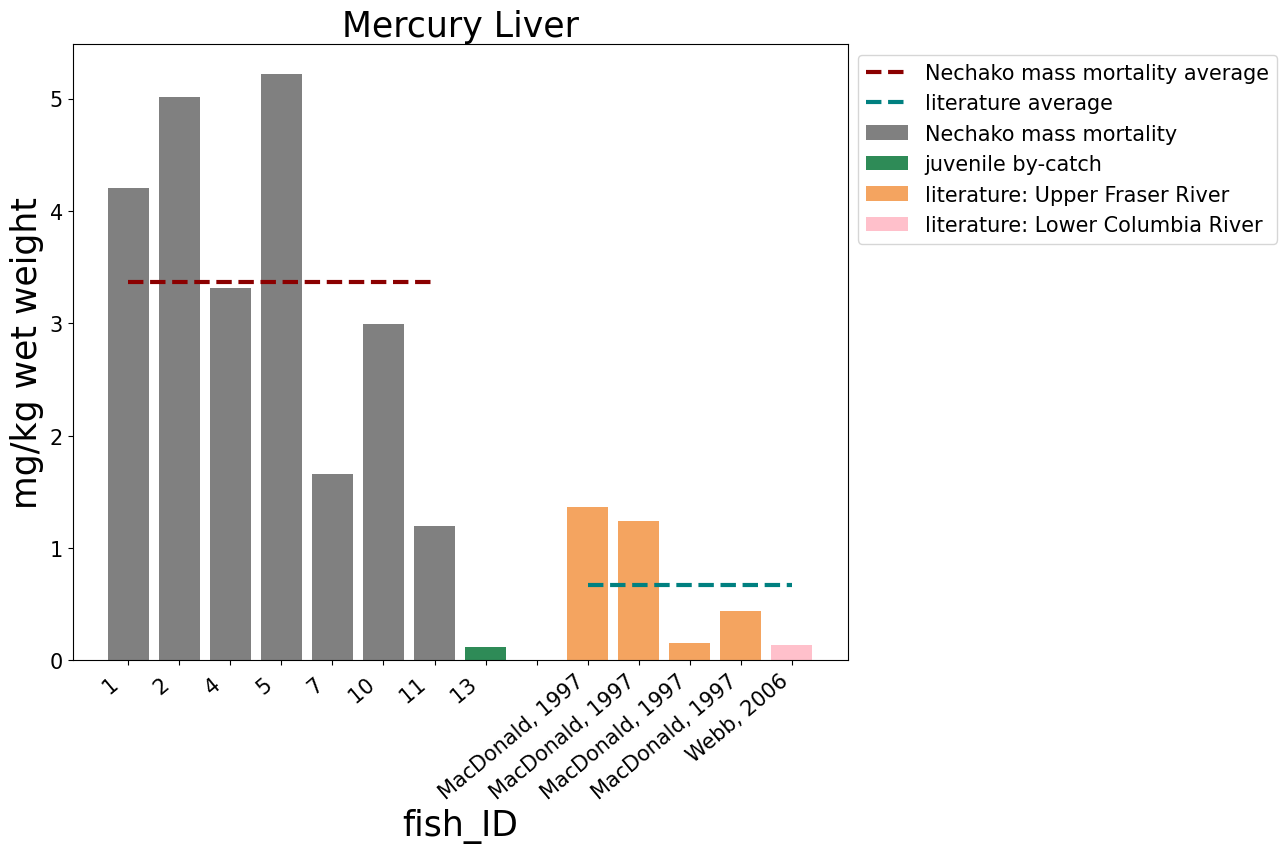

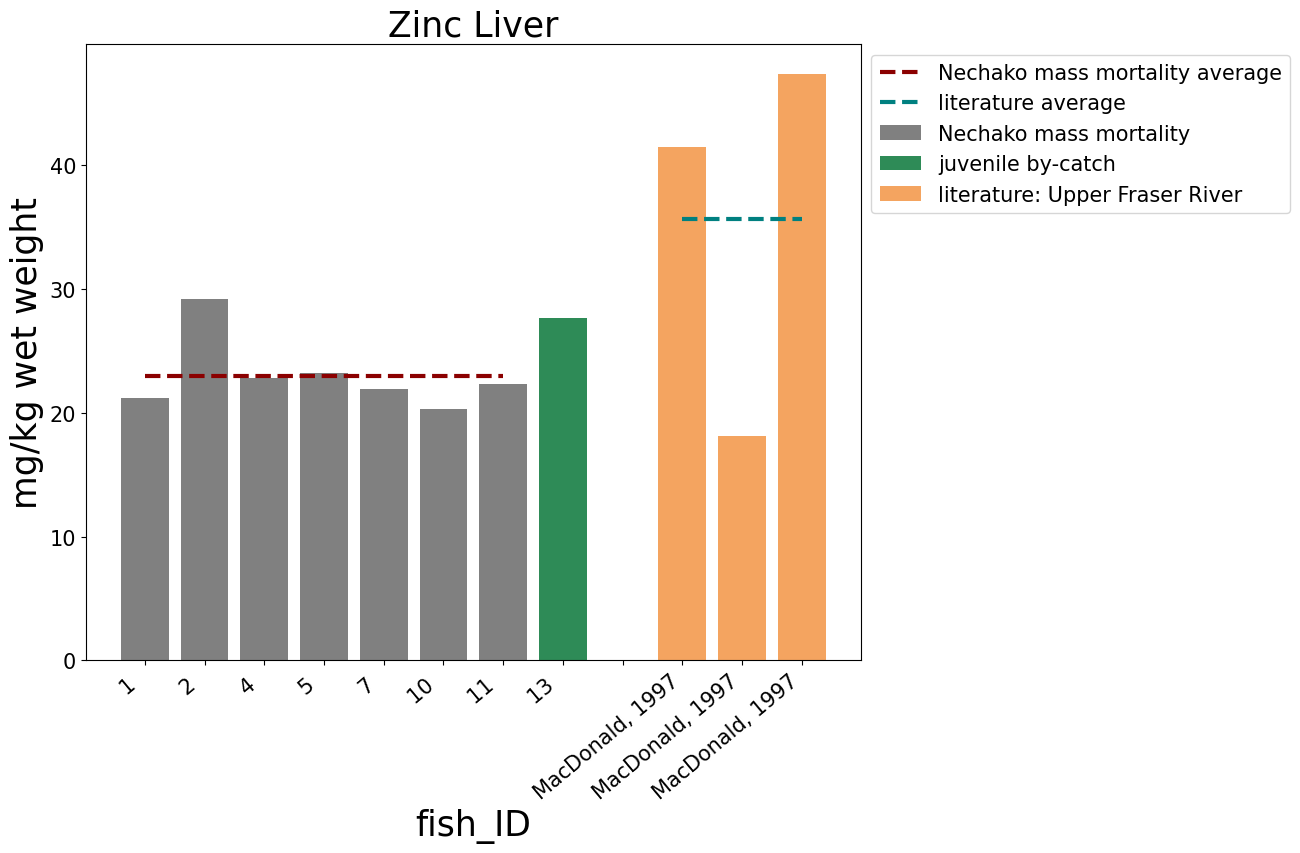

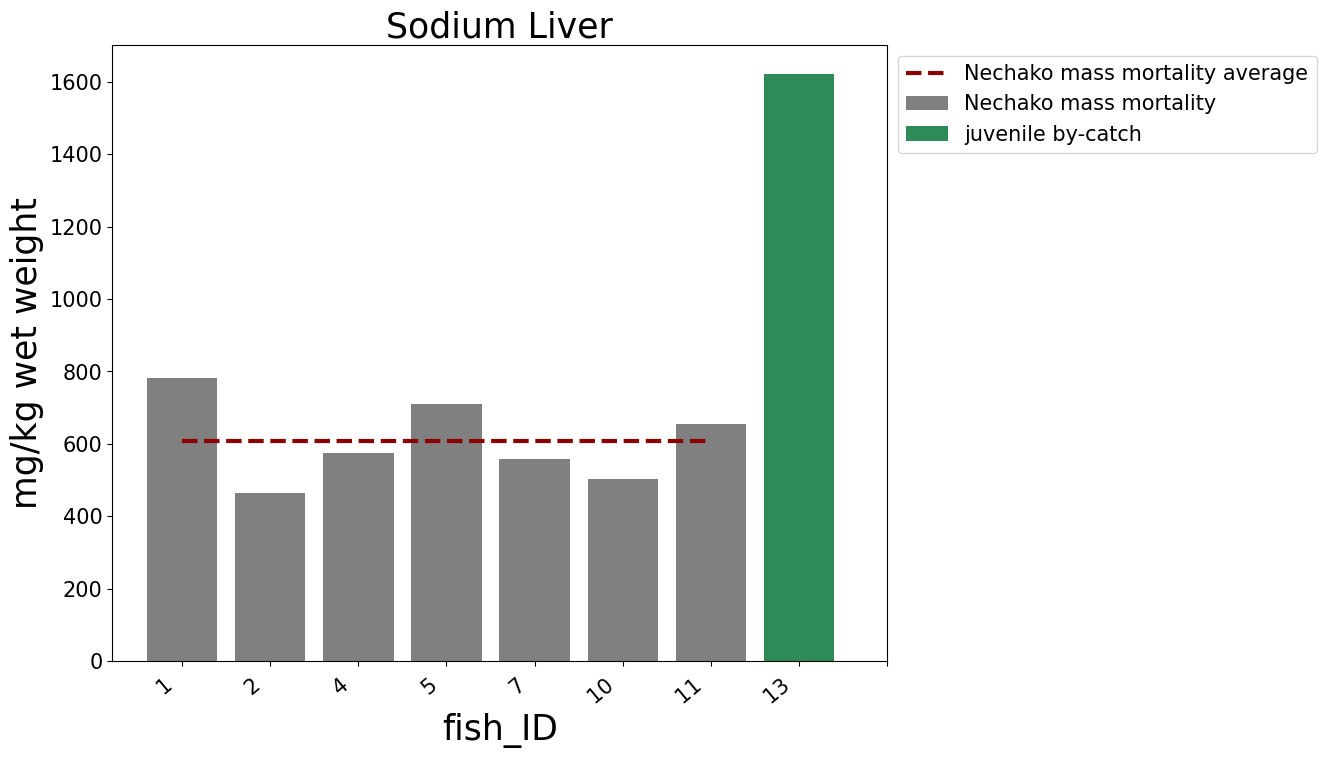

In [62]:
elements = ref.columns[5:]

x = data.columns[3:]
# seperating liver and mt using columns contatins the word "Liver"
Liver_id = x.str.contains("Liver")

id_13 = x.str.contains("#13")
colorl = x.to_numpy().copy()
colorl[Liver_id] = 'gray' # -> liver color
colorl[~Liver_id] = 'darksalmon' # -> muscle color
colorl[id_13] = 'seagreen' # -> 13 color
ticklabel = x.str.removeprefix('White Sturgeon (WS #')
ticklabel = ticklabel.str.replace(')','', regex=False)
ticklabel = ticklabel.str.replace('MT','',regex=False) 
ticklabel = ticklabel.str.replace('Liver','',regex=False) 

for tissue, t_name in zip(['MT', 'Liver'], ['Muscle', "Liver"]):
    if tissue == 'MT':
        temp = ~Liver_id
    else:
        temp = Liver_id
    for i in np.arange(len(elements)):
        plt.figure(figsize=(10, 8), facecolor= 'white')
        # obtaining related data
        values = np.array(data[np.logical_and(data["Analyte"] == elements[i], data["Units"] == "mg/kg wwt")].to_numpy()[:, 3:].ravel(), dtype=float)

        # finding nans to ignore in future
        nan_id = ref.loc[:, elements[i]].isna()
        
        # bar without 13
        id = temp & (~id_13)
        n = len(x[id])
        plt.bar(np.arange(n), values[id], color = colorl[id], label="Nechako mass mortality")
        
        # plotting just 13
        id = temp & (id_13)
        plt.bar(np.arange(n, n+1), values[id], color = colorl[id], label="juvenile by-catch")
        
        # plotting mean
        id = temp & (~id_13)
        plt.plot(np.arange(n), np.mean(values[id]).repeat(values[id].shape), color = 'darkred', linestyle = "dashed", linewidth = 3, label = 'Nechako mass mortality average')
        n += 2
        for c in ref['color'].unique():
            y = ref.loc[(ref["Tissue"] == tissue) & (~nan_id) & (ref['color'] == c), [elements[i], 'Group']]
            if y.size > 0:
                plt.bar(np.arange(n, n + len(y)), y.iloc[:, 0].to_numpy('float'), color = c, label = f"literature: {y.iloc[:, 1].to_numpy('str')[0]}")
                n = n + len(y)
        y = ref.loc[(ref["Tissue"] == tissue) & (~nan_id), [elements[i]]].to_numpy('float')
        if y.size > 0:
            plt.plot(np.arange(n-len(y), n), np.mean(y).repeat(y.shape[0]), color = 'teal', linestyle = "dashed", linewidth = 3, label = 'literature average')
        plt.legend(fontsize = 15, bbox_to_anchor=(1, 1), loc='upper left')
        plt.title(f'{elements[i]} {t_name}', fontsize = 25)
        plt.xlabel("fish_ID", fontsize = 25)
        plt.ylabel("mg/kg wet weight", fontsize = 25)
        plt.xticks(ticks = np.arange(n),
                   labels = ticklabel[temp].to_list() + [''] + ref.loc[(ref["Tissue"] == tissue) & (~nan_id), 'Fish'].to_list(), rotation = 40, ha = "right", fontsize = 15)
        plt.yticks(fontsize = 15)
        if not os.path.exists("./pics/etwas/"):
            os.makedirs("./pics/etwas/")
        plt.savefig("./pics/etwas/"+elements[i]+'_'+tissue+".png")

## Only Muscle and Liver

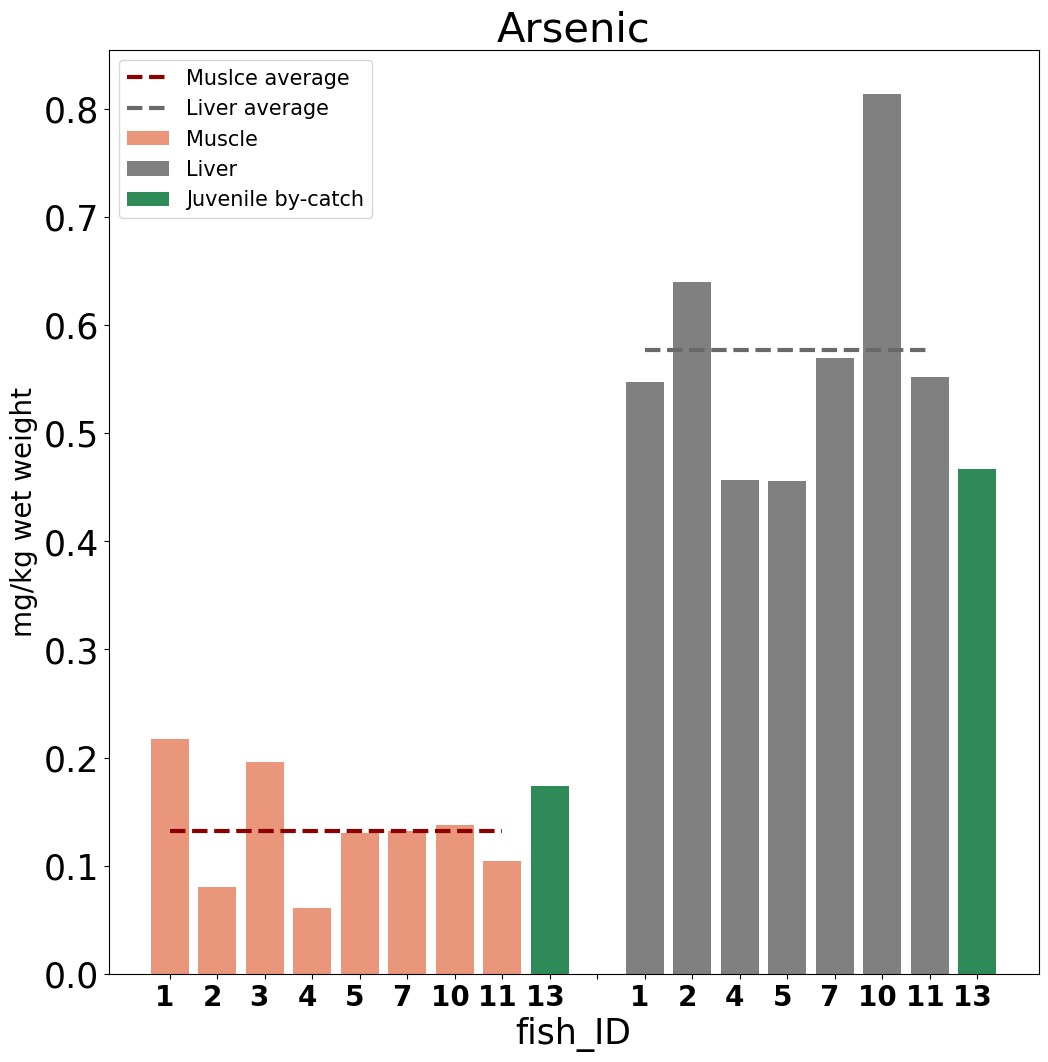

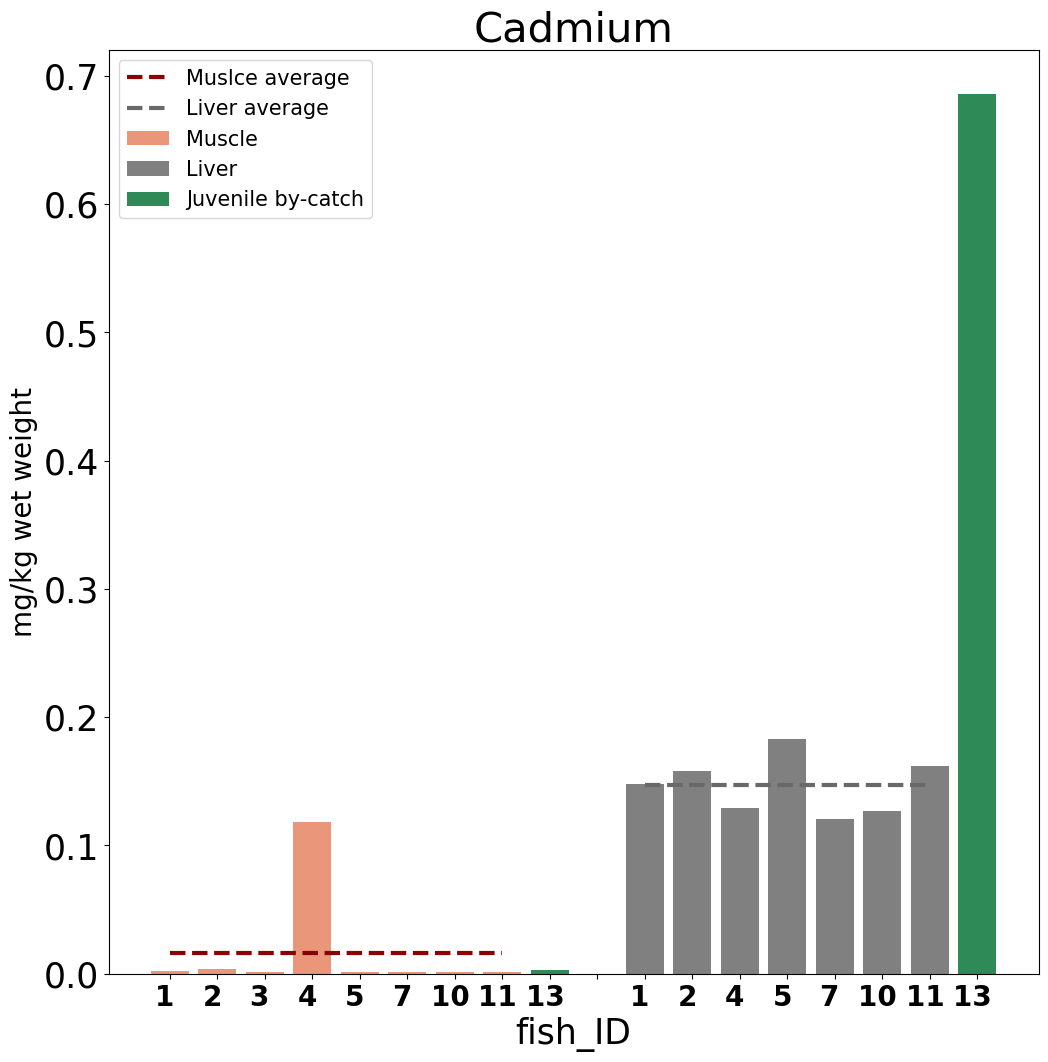

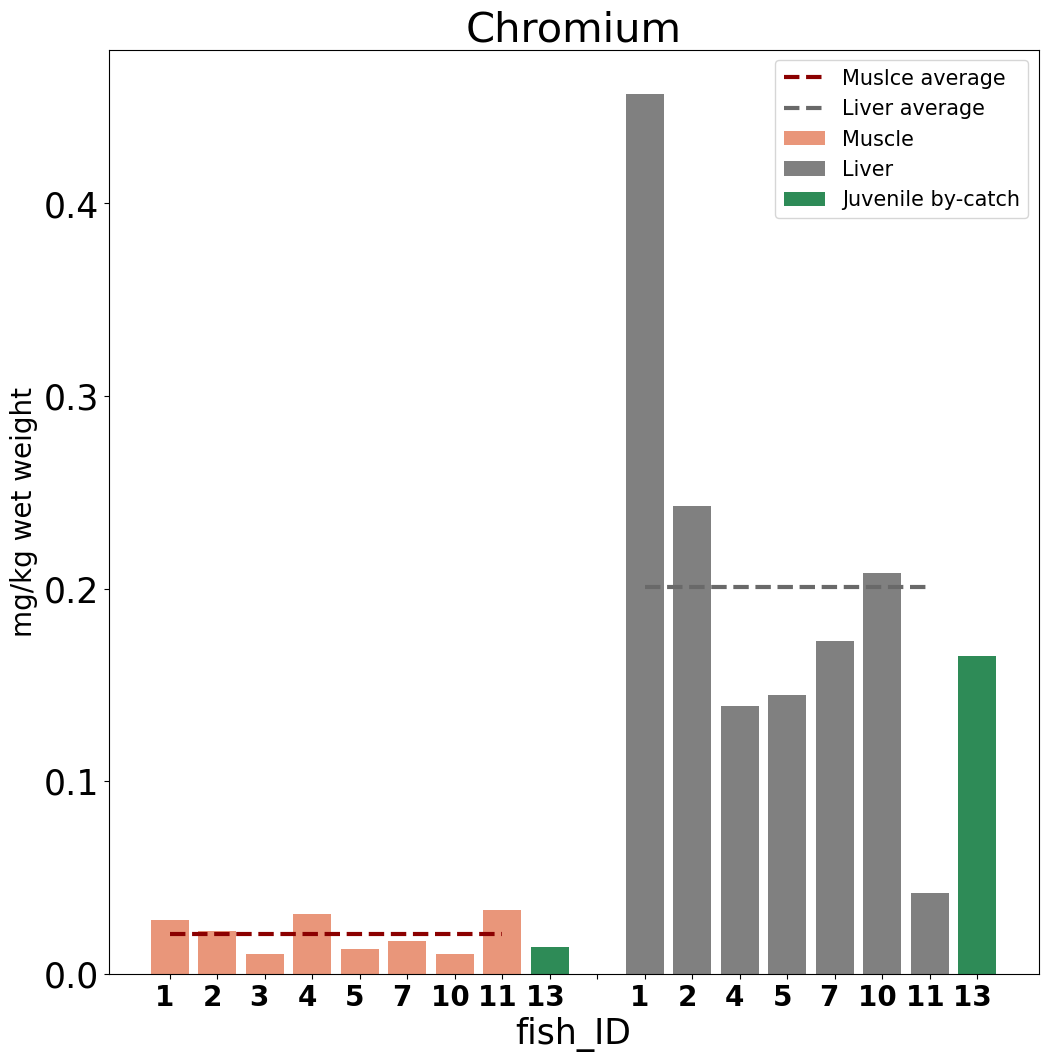

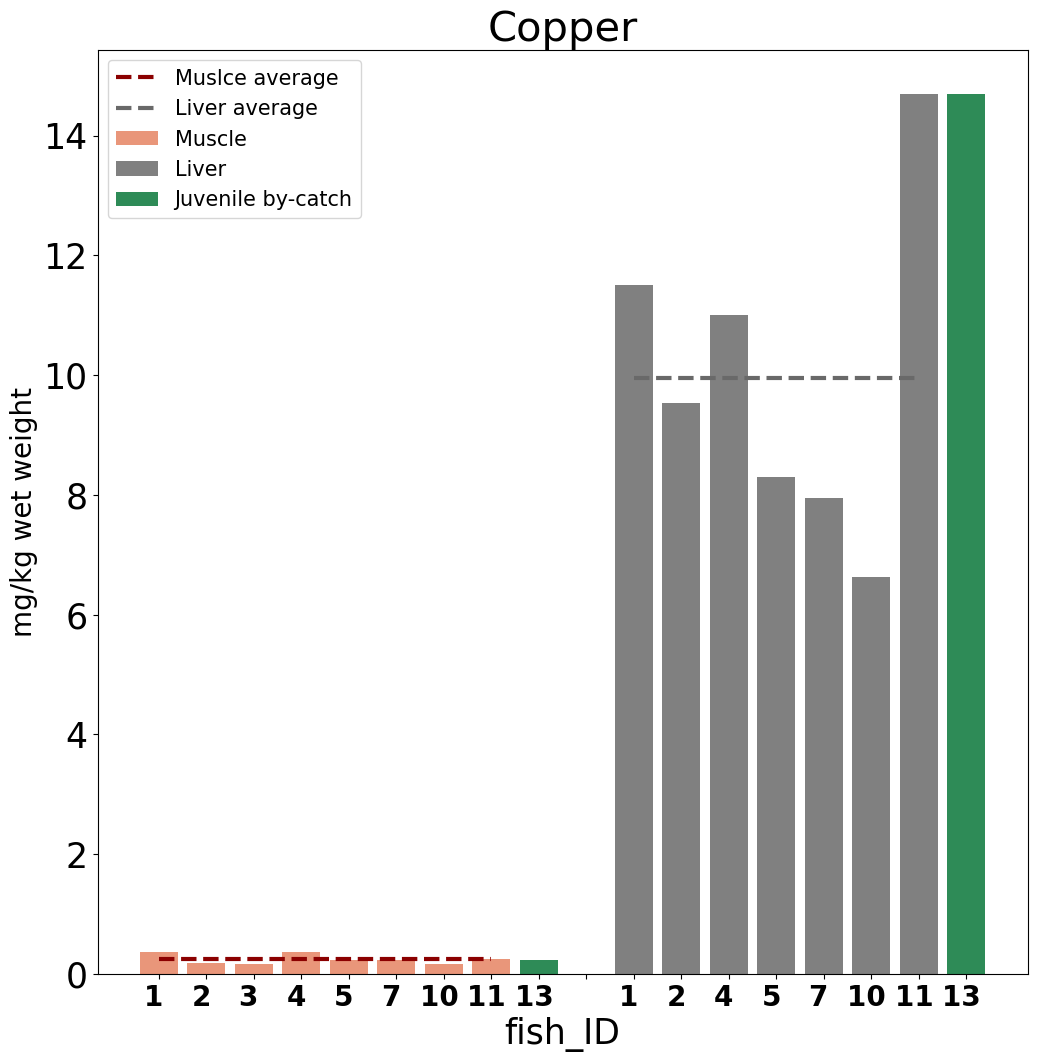

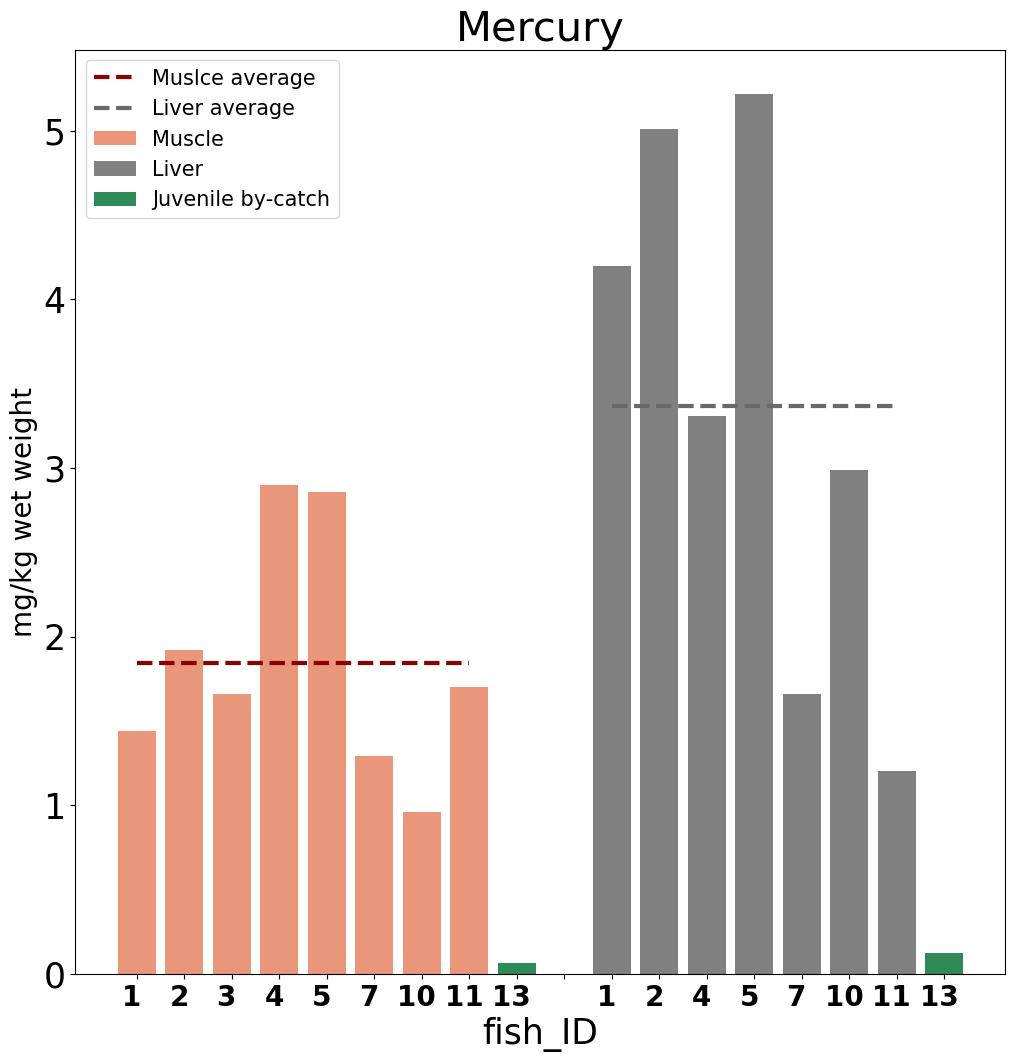

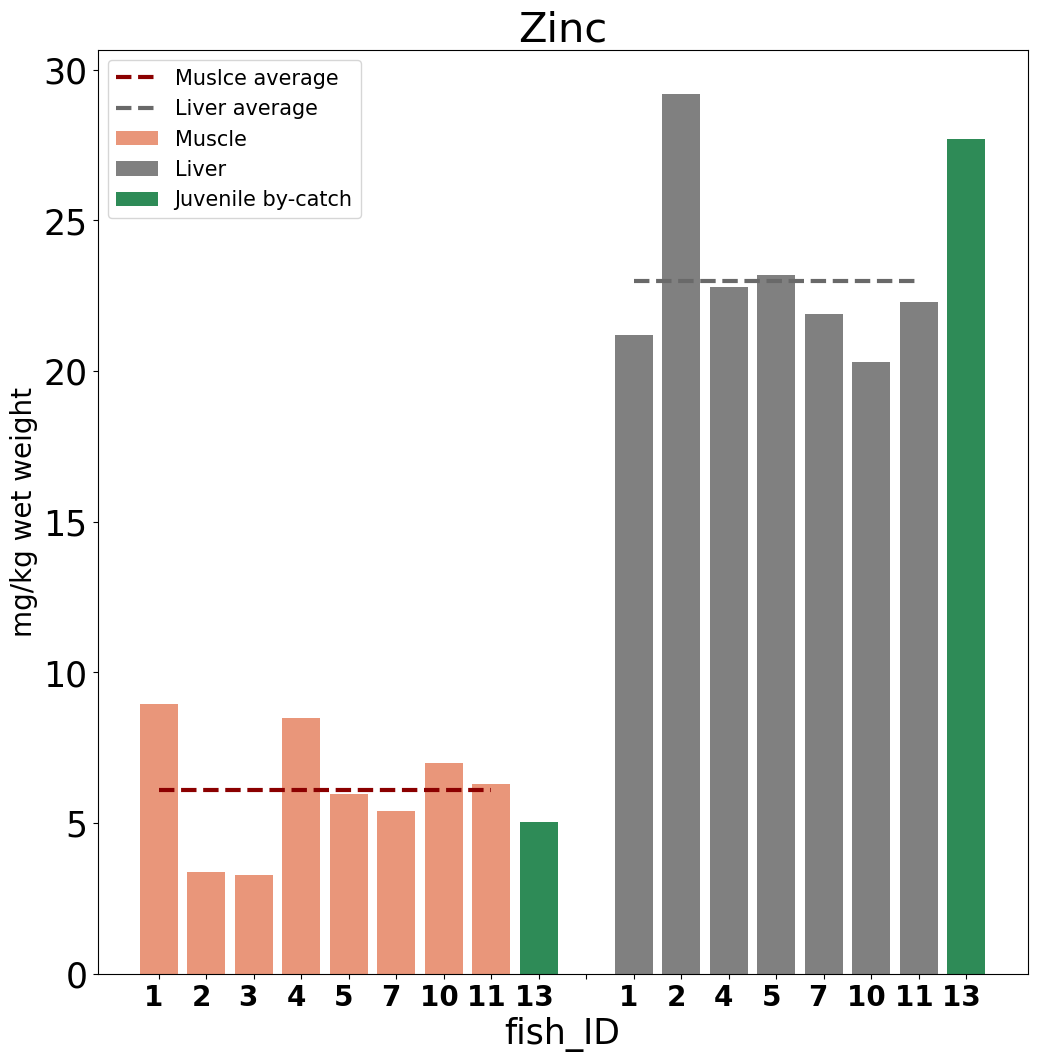

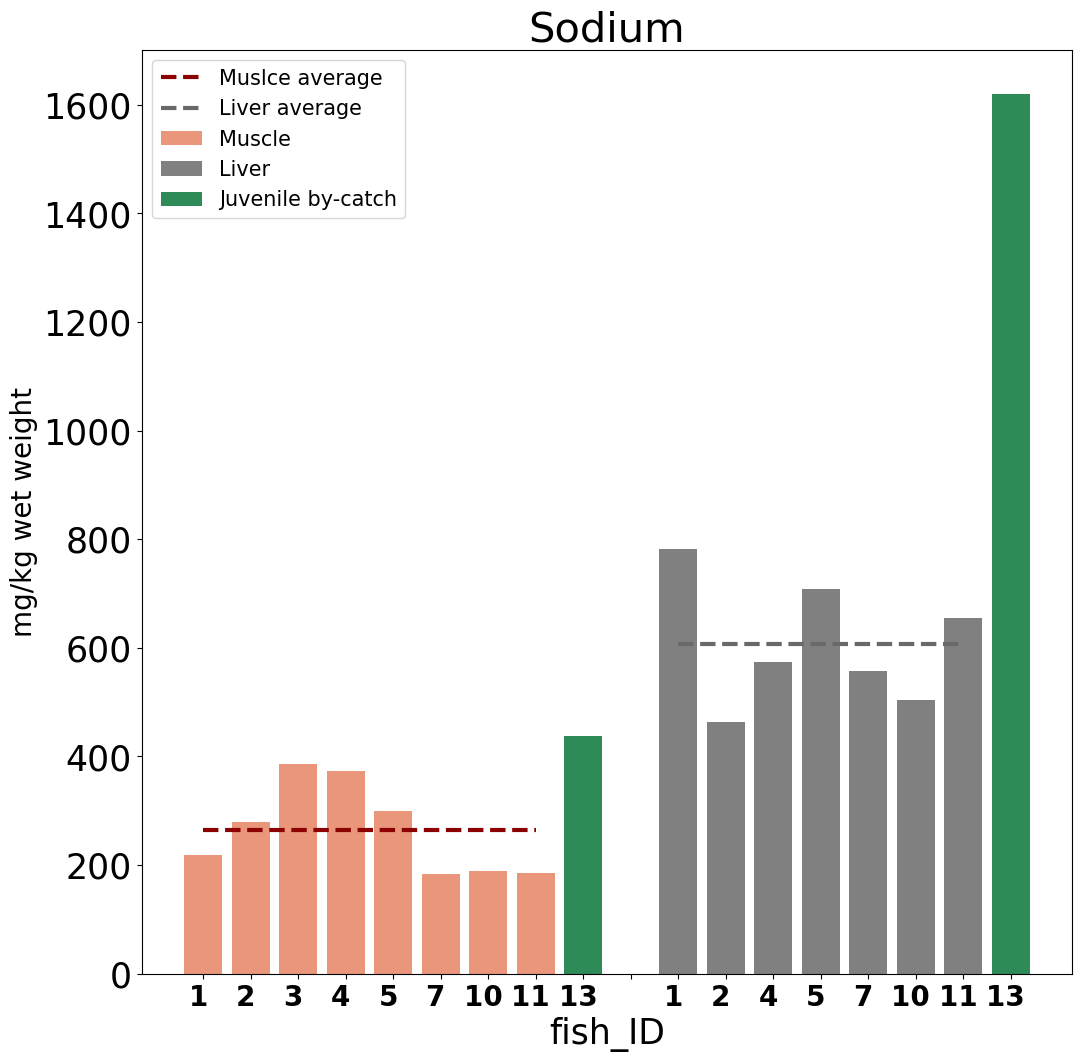

In [63]:
elements = ref.columns[5:]

x = data.columns[3:]
# seperating liver and mt using columns contatins the word "Liver"
Liver_id = x.str.contains("Liver")
id_13 = x.str.contains("#13")
colorl = x.to_numpy().copy()
colorl[Liver_id] = 'gray' # -> liver color
colorl[~Liver_id] = 'darksalmon' # -> muscle color
colorl[id_13] = 'seagreen' # -> 13 color
ticklabel = x.str.removeprefix('White Sturgeon (WS #')
ticklabel = ticklabel.str.replace(')','', regex=False)
ticklabel = ticklabel.str.replace('MT','',regex=False) 
ticklabel = ticklabel.str.replace('Liver','',regex=False) 


for i in np.arange(len(elements)):
    plt.figure(figsize=(12, 12), facecolor= 'white')
    # obtaining related data
    values = np.array(data[np.logical_and(data["Analyte"] == elements[i], data["Units"] == "mg/kg wwt")].to_numpy()[:, 3:].ravel(), dtype=float)

    # finding nans to ignore in future
    nan_id = ref.loc[:, elements[i]].isna()
    temp = ~Liver_id
    # bar without 13
    id = temp & (~id_13)
    n = len(x[id])
    plt.bar(np.arange(n), values[id], color = colorl[id], label="Muscle")
    
    # plotting just 13
    id = temp & (id_13)
    plt.bar(np.arange(n, n+1), values[id], color = colorl[id])
    
    # plotting mean
    id = temp & (~id_13)
    plt.plot(np.arange(n), np.mean(values[id]).repeat(values[id].shape), color = 'darkred', linestyle = "dashed", linewidth = 3, label = 'Muslce average')
    n += 2

    temp = Liver_id
    # bar without 13
    id = temp & (~id_13)
    plt.bar(np.arange(n, n+id.sum()), values[id], color = colorl[id], label="Liver")
    n = n + id.sum()

    # plotting just 13
    id = temp & (id_13)
    plt.bar(np.arange(n, n+1), values[id], color = colorl[id], label = "Juvenile by-catch")
    n = n+1

    # plotting mean
    id = temp & (~id_13)
    plt.plot(np.arange(n-id.sum(), n)-1, np.mean(values[id]).repeat(values[id].shape), color = 'dimgrey', linestyle = "dashed", linewidth = 3, label = 'Liver average')
    

    plt.legend(fontsize = 15)
    plt.title(f'{elements[i]}', fontsize = 30)
    plt.xlabel("fish_ID", fontsize = 25)
    plt.ylabel("mg/kg wet weight", fontsize = 20)
    plt.xticks(ticks = np.arange(n),
                labels = ticklabel[~temp].to_list() + [''] + ticklabel[temp].to_list(), fontsize = 20, fontweight = 'bold')
    plt.yticks(fontsize = 25)
    if not os.path.exists("./pics/etwas/barPlot+13/"):
        os.makedirs("./pics/etwas/barPlot+13/")
    plt.savefig("./pics/etwas/barPlot+13/"+elements[i]+'_'+tissue+".png")